In [ ]:
import numpy as np
import scipy.misc
import cv2  # using opencv 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# Định nghĩa hàm tích chập để lọc bộ lọc
def Tich_chap(img,mask):
    m, n = img.shape
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp   =  img[i-1, j-1]    * mask[0, 0]\
                    +  img[i-1, j]      * mask[0, 1]\
                    +  img[i-1, j + 1]  * mask[0, 2]\
                    +  img[i, j-1]      * mask[1, 0]\
                    +  img[i, j]        * mask[1, 1]\
                    +  img[i, j + 1]    * mask[1, 2]\
                    +  img[i + 1, j-1]  * mask[2, 0]\
                    +  img[i + 1, j]    * mask[2, 1]\
                    +  img[i + 1, j + 1]* mask[2, 2]
            img_new[i, j]= temp
    img_new = img_new.astype(np.uint8)
    return img_new


# **Làm mềm ảnh (blur/smoothing ) bằng lọc Gaussian**

In [ ]:

# Định nghĩa bộ lọc Gaussian
def Gaussian():
  locGaussian3x3 = np.array(([0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976],
                            [0.1238/4.8976, 0.2042/4.8976, 0.1238/4.8976],
                            [0.0751/4.8976, 0.1238/4.8976, 0.0751/4.8976]), dtype="float")

  fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
  ax1, ax2 = fig.subplots(1, 2)

  # Đọc và hiển thị ảnh gốc
  image = cv2.imread('nhieu.jpg', 0)
  ax1.imshow(image, cmap='gray')
  ax1.set_title("Ảnh gốc")

  # Lọc Gaussian và hiển thị ảnh
  imgGaussian_3x3 = Tich_chap(image, locGaussian3x3) #Gọi hàm lọc
  ax2.imshow(imgGaussian_3x3, cmap='gray')
  ax2.set_title("Ảnh lọc Gaussian 3x3")


  # Hiển thị vùng vẽ
  plt.show()

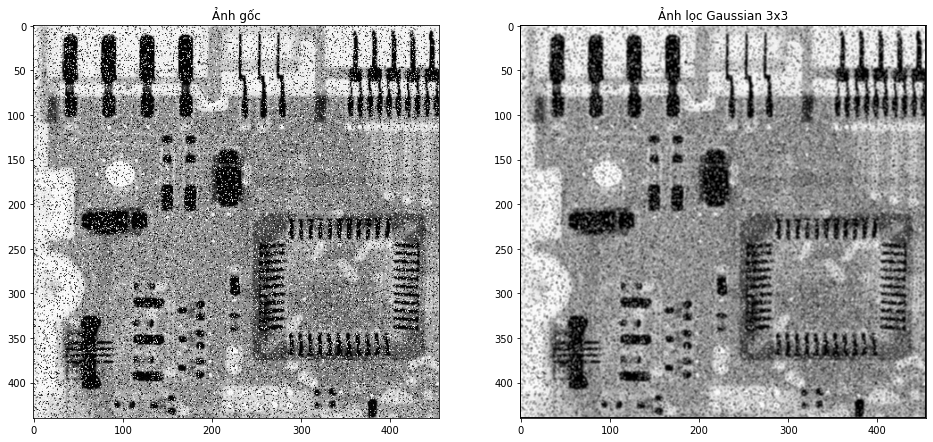

In [ ]:
Gaussian()

*** Cải thiện độ sắc nét của ảnh dùng lọc Laplace***

In [ ]:
def Laplacian():
    # Định nghĩa bộ lọc Laplacian chuẩn
    locLaplacian_chuan = np.array(([0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]), dtype="float")

    # Định nghĩa bộ lọc Laplacian biến thể 1
    locLaplacian_Bien_The_1 = np.array(([1, 1, 1],
                                        [1, -8, 1],
                                        [1, 1, 1]), dtype="float")

    # Định nghĩa bộ lọc Laplacian biến thể 2
    locLaplacian_Bien_The_2 = np.array(([0, -1, 0],
                                        [-1, 4, -1],
                                        [0, -1, 0]), dtype="float")

    # Định nghĩa bộ lọc Laplacian biến thể 3
    locLaplacian_Bien_The_3 = np.array(([-1, -1, -1],
                                        [-1, 8, -1],
                                        [-1, -1, -1]), dtype="float")

    #bộ lọc laplacian đơn giản hóa
    locLaplacian_Cai_Thien = np.array(([-1, -1, -1],
                                        [-1, 5, -1],
                                        [-1, -1, -1]), dtype="float")

    fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
    (ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3) # Tạo 6 vùng vẽ con

    # Đọc và hiển thị ảnh gốc
    image = cv2.imread('test2.tif', 0)
    ax1.imshow(image, cmap='gray')
    ax1.set_title("Ảnh gốc")

    # Lọc Laplacian chuẩn và hiển thị ảnh
    img_loc_Laplacian_chuan = Tich_chap(image, locLaplacian_chuan) #Gọi hàm tích chập
    ax2.imshow(img_loc_Laplacian_chuan, cmap='gray')
    ax2.set_title("Ảnh lọc Laplace chuẩn")

    # Tạo ảnh cải thiện từ lọc Laplacian chuẩn và hiển thị ảnh
    img_cai_thien_locLaplacian_chuan = image - img_loc_Laplacian_chuan
    ax3.imshow(img_cai_thien_locLaplacian_chuan, cmap='gray')
    ax3.set_title("Ảnh Cải thiện từ Laplace chuẩn")

    #Không hiển thị trục tọa độ tại vùng ax4
    ax4.axis('off')

    # Lọc Laplacian Biến thể thứ nhất và hiển thị ảnh
    img_loc_Laplacian_Bien_The_1 = Tich_chap(image, locLaplacian_Bien_The_1) #Gọi hàm tích chập
    ax5.imshow(img_loc_Laplacian_Bien_The_1, cmap='gray')
    ax5.set_title("Ảnh lọc Laplace biến thể 1")

    # Tạo ảnh cải thiện từ lọc Laplacian Biến thể thứ nhất và hiển thị ảnh
    img_cai_thien_loc_Laplacian_Bien_The_1 = image - img_loc_Laplacian_Bien_The_1
    ax6.imshow(img_cai_thien_loc_Laplacian_Bien_The_1, cmap='gray')
    ax6.set_title("Ảnh Cải thiện từ Laplace biến thể 1")

    # Hiển thị vùng vẽ
    plt.show()

    # Việc thực hiện các biến thể của bộ lọc Laplacian thực hiện code tương tự
    # nhưng thay thế mặc nạ lọc khác nhau
    # Việc thực hiện bộ lọc đơn giản hóa Laplacian thì ảnh lọc chính là ảnh kết quả

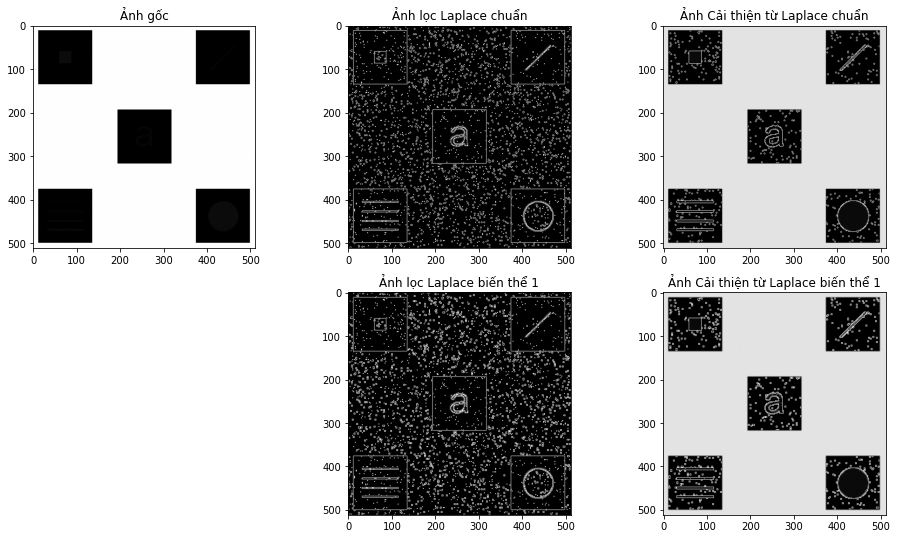

In [ ]:
Laplacian()

 Cải thiện độ sắc nét của ảnh dùng lọc Sobel
 



In [ ]:
def Sobel():
    # Định nghĩa Sobel theo hướng X
    locSobelX = np.array(([-1,-2,-1],
                          [ 0, 0, 0],
                          [ 1, 2, 1]), dtype="float")

    # Định nghĩa bộ lọc Sobel theo hướng Y
    locSobelY = np.array(([-1, 0, 1],
                          [-2, 0, 2],
                          [ 1, 0, 1]), dtype="float")

    fig = plt.figure(figsize=(16, 9)) # Tạo vùng vẽ tỷ lệ 16:9
    (ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(2, 3) # Tạo 6 vùng vẽ con

    # Đọc và hiển thị ảnh gốc
    image = cv2.imread('test1.tif', 0)
    ax1.imshow(image, cmap='gray')
    ax1.set_title("Ảnh gốc")

    # Lọc Sobel theo hướng X và hiển thị ảnh
    imgSobelX = Tich_chap(image, locSobelX) #Gọi hàm tích chập
    ax2.imshow(imgSobelX, cmap='gray')
    ax2.set_title("Ảnh lọc SobelX")

    # Lọc Sobel theo hướng Y và hiển thị ảnh
    imgSobelY = Tich_chap(image, locSobelY) #Gọi hàm tích chập
    ax3.imshow(imgSobelY, cmap='gray')
    ax3.set_title("Ảnh lọc SobelY")

    ax4.axis('off')

    # Ảnh tổng Sobel theo hướng Y và Sobel theo hướng Y và hiển thị ảnh
    imgSobelXY = imgSobelX + imgSobelY
    ax5.imshow(imgSobelXY, cmap='gray')
    ax5.set_title("Ảnh lọc SobelX + SobelY")

    # Ảnh cuối cùng = ảnh gốc + ảnh tổng Sobel theo hướng Y
    # và Sobel theo hướng Y và hiển thị ảnh
    imgSobel_ketqua = image + imgSobelXY
    ax6.imshow(imgSobel_ketqua, cmap='gray')
    ax6.set_title("Ảnh Kết quả")

    # Hiển thị vùng vẽ
    plt.show()

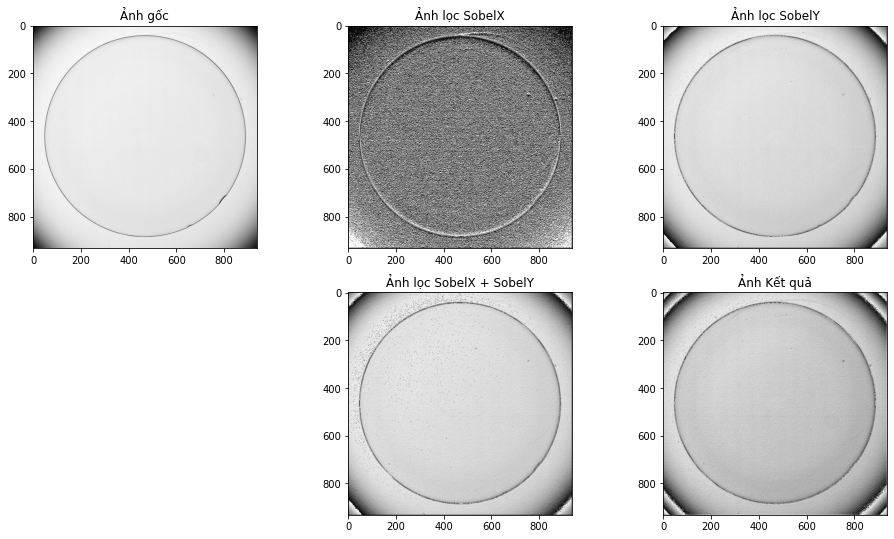

In [ ]:
Sobel()